# Recommendation System

# 1. Data Loading

## 1.1. Kaggle Credentials

Kaggle Username dan Kaggle Key diperlukan untuk mengakses dataset pada Kaggle. Kedua variabel tersebut kemudian disimpan dalam environment variable dengan bantuan library `os`.

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'raflimuhamm'
os.environ['KAGGLE_KEY'] = 'f2ae9f96f96b810defeca3882af455c8'


## 1.2. Download the Dataset

Dataset yang digunakan adalah [Indonesia Tourism Destination](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination) dengan `tourism_with_id.csv` dan `tourism_rating.csv` sebagai dataset.

In [2]:
# Download tourism_with_id.csv dan tourism_rating.csv ke local directory
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_with_id.csv -p .
!kaggle datasets download -d aprabowo/indonesia-tourism-destination -f tourism_rating.csv -p .

  0% 0.00/357k [00:00<?, ?B/s]
100% 357k/357k [00:00<00:00, 98.4MB/s]
  0% 0.00/102k [00:00<?, ?B/s]
100% 102k/102k [00:00<00:00, 87.0MB/s]


# 2. Data Understanding

## 2.1. Jumlah Data

Menampilkan masing-masing dataset yaitu `tourism_with_id.csv` dan `tourism_rating.csv` menggunakan library pandas dari format .csv menjadi dataframe.

In [3]:
import pandas as pd

places = pd.read_csv('tourism_with_id.csv')
ratings = pd.read_csv('tourism_rating.csv')

print('Jumlah places: ', len(places.Place_Id.unique()))
print('Jumlah ratings: ', len(ratings.Place_Ratings))


Jumlah places:  437
Jumlah ratings:  10000


## 2.2. Univariate Exploratory Data Analysis (EDA)

Di sini akan dilakukan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### 2.2.1. Dataset Tourism Destinations (Places)

Pengecekan informasi variabel dari dataset places berupa jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [4]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


File ini terdiri dari 10 kolom sebagai berikut:

- Place_Id: kolom yang menunjukkan id dari setiap tempat wisata.
- Place_Name: kolom yang menunjukkan nama dari setiap tempat wisata.
- Description: kolom yang menunjukkan deskripsi dari setiap tempat wisata.
- Category: kolom yang menunjukkan kategori dari setiap tempat wisata.
- City: kolom yang menunjukkan kota dimana tempat wisata tersebut berada.
- Price: kolom yang menunjukkan harga tiket masuk ke tempat wisata tersebut.
- Rating: kolom yang menunjukkan rating dari setiap tempat wisata.
- Time_Minutes: kolom yang menunjukkan waktu yang diperlukan untuk mengunjungi tempat wisata tersebut.
- Coordinate: kolom yang menunjukkan koordinat dari setiap tempat wisata.
- Lat: kolom yang menunjukkan latitude dari setiap tempat wisata.
- Long: kolom yang menunjukkan longitude dari setiap tempat wisata.

Menampilkan sample dataset places.

In [5]:
places.head()


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Melakukan pengecekan deskripsi statistik dataset places dengan fitur describe().

In [6]:
places.describe()


,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu:
1. count: Jumlah sampel data
2. mean: Nilai rata-rata
3. std: Standar deviasi
4. min: Nilai minimum
5. 25%: Kuartil bawah/Q1
6. 50%: Kuartil tengah/Q2/median
7. 75%: Kuartil atas/Q3
8. max: Nilai maksimum

### 2.2.2. Dataset Ratings

Pengecekan informasi variabel dari dataset ratings berupa jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [7]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


File ini terdiri dari 3 kolom sebagai berikut:

- User_Id: identitas unik dari setiap pengguna.
- Place_Id: identitas unik dari setiap tempat wisata.
- Place_Ratings: penilaian atau rating yang diberikan oleh pengguna terhadap tempat wisata tertentu.

Menampilkan sample dataset ratings.

In [8]:
ratings.head()


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Melakukan pengecekan deskripsi statistik dataset ratings dengan fitur describe().

In [9]:
ratings.describe()


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


# **3. Data Preparation**

Tahap data preparation merupakan proses transformasi data menjadi bentuk yang dapat diterima oleh model machine learning nanti. Proses data preparation yang dilakukan, yaitu membersihkan data missing value, dan melakukan pengecekan data duplikat.

## 3.1. Menghapus Kolom yang Tidak Diperlukan

Data yang diperlukan hanya ada pada kolom `Place_Id`, `Place_Name`, dan `Category`, jadi hapus yang lain.

In [10]:
places = places.drop(['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

## 3.2. Pengecekan Missing Value

In [11]:
places.isnull().sum()


Place_Id      0
Place_Name    0
Category      0
dtype: int64

In [12]:
ratings.isnull().sum()


User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

## 3.3. Pengecekan Data Duplikat

In [13]:
print(f'Jumlah data places yang duplikat: {places.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')


Jumlah data places yang duplikat: 0
Jumlah data rating yang duplikat: 79


Menghapus duplicate

In [14]:
ratings.drop_duplicates(inplace = True)

# **4. Model Development dengan Collaborative Filtering**

Collaborative Filtering adalah teknik merekomendasikan item yang mirip dengan preferensi pengguna yang sama di masa lalu, misalnya berdasarkan penilaian tempat yang telah diberikan oleh seorang pengguna. Sistem akan merekomendasikan tempat berdasarkan riwayat penilaian pengguna tersebut terhadap tempat dan kategorinya.

### 4.1. Data Preparation

In [15]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt


Proses encoding fitur User_Id pada dataset ratings menjadi array.

In [16]:
user_ids = ratings['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)


list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Proses encoding fitur Place_Id pada dataset ratings menjadi array.

In [17]:
place_ids = ratings['Place_Id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

Melakukan mapping atau pemetaan kolom user dan place ke dataset ratings yang berkaitan.

In [18]:
ratings['user'] = ratings['User_Id'].map(user_to_user_encoded)
ratings['place'] = ratings['Place_Id'].map(place_to_place_encoded)


Melakukan pengecekan jumlah user, jumlah tempat, penilaian minimal, dan penilaian maksimal.

In [19]:
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

ratings['rating'] = ratings['Place_Ratings'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')


Users Count: 300
Places Count: 437
Min rating: 1.0
Max rating: 5.0


### 4.2. Split Data Latih dan Data Validasi

Mengacak dataset ratings.

In [20]:
ratings = ratings.sample(frac=1, random_state=42)
ratings


,User_Id,Place_Id,Place_Ratings,user,place,rating
5315,161,260,2,160,259,2.0
518,17,262,2,16,54,2.0
4362,133,191,5,132,240,5.0
8447,255,156,1,254,241,1.0
9105,274,78,3,273,35,3.0
...,...,...,...,...,...,...
5782,174,296,3,173,154,3.0
5237,159,69,4,158,406,4.0
5437,164,24,5,163,74,5.0
871,28,131,5,27,70,5.0


Membagi dataset menjadi data latih (train) dan data uji (test), yaitu sebesar 20% data uji dan 80% data latih.

In [21]:
x = ratings[['user', 'place']].values
y = ratings['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)


[[160 259]
 [ 16  54]
 [132 240]
 ...
 [163  74]
 [ 27  70]
 [220  63]] [0.25 0.25 1.   ... 1.   1.   0.5 ]


### 4.3. Model Development

Melakukan pendefinisian kelas RecommenderNet untuk membangun model klasifikasi teks tersebut. Model ini akan memberikan rekomendasi kepada pengguna berdasarkan preferensi atau kecenderungan pengguna di masa lalu. Model ini dapat digunakan dalam berbagai bidang, seperti rekomendasi film, musik, produk, dan lain-lain. RecommenderNet menggunakan algoritma pembelajaran mesin seperti collaborative filtering atau content-based filtering untuk menentukan rekomendasi yang tepat untuk pengguna.

Parameter yang digunakan dalam model ini adalah:
- users_count: jumlah user yang akan jadi input dimension pada user embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
- place_count: jumlah tempat yang akan jadi input dimension pada tempat embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
- embedding_size: ukuran embedding akan jadi output dimension pada user embedding dan tempat embedding, yaitu jumlah fitur yang dihasilkan oleh Embedding layer, yang merupakan hasil pengurangan dimensi dari input data.

Embedding layer ini akan mengubah representasi numerik dari input data menjadi representasi vektor yang lebih bermakna dan dapat dipahami oleh model machine learning.

In [22]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

Proses kompilasi atau compile dengan:
- binary crossentropy loss function: loss function untuk menghitung loss pada model klasifikasi biner.
- adam optimizer: algoritma optimisasi yang digunakan untuk mengupdate bobot pada model machine learning secara efisien.
- metrik RMSE (Root Mean Square Error): metrik yang digunakan untuk mengukur seberapa jauh hasil prediksi dari model dari nilai aktual. RMSE dihitung dengan mencari rata-rata dari kuadrat error yang diakumulasikan dari seluruh data.

In [23]:
model = RecommenderNet(users_count, place_count, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


Menambahkan callback EarlyStopping yang akan menghentikan training jika tidak ada peningkatan selama 5 epochs.

In [24]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)


Melatih model.

In [25]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)


Epoch 1/100
992/992 [==============================] - 10s 8ms/step - loss: 0.6943 - root_mean_squared_error: 0.3452 - val_loss: 0.6949 - val_root_mean_squared_error: 0.3506
Epoch 2/100
992/992 [==============================] - 6s 6ms/step - loss: 0.6940 - root_mean_squared_error: 0.3450 - val_loss: 0.6948 - val_root_mean_squared_error: 0.3505
Epoch 3/100
992/992 [==============================] - 8s 8ms/step - loss: 0.6926 - root_mean_squared_error: 0.3440 - val_loss: 0.6949 - val_root_mean_squared_error: 0.3506
Epoch 4/100
992/992 [==============================] - 7s 7ms/step - loss: 0.6913 - root_mean_squared_error: 0.3431 - val_loss: 0.6949 - val_root_mean_squared_error: 0.3506
Epoch 5/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6895 - root_mean_squared_error: 0.3418 - val_loss: 0.6948 - val_root_mean_squared_error: 0.3505
Epoch 6/100
992/992 [==============================] - 4s 4ms/step - loss: 0.6886 - root_mean_squared_error: 0.3411 - val_loss: 0.6948

Visualisasi grafik data training dan testing untuk masing-masing metrik Root Mean Square Error dan loss function.

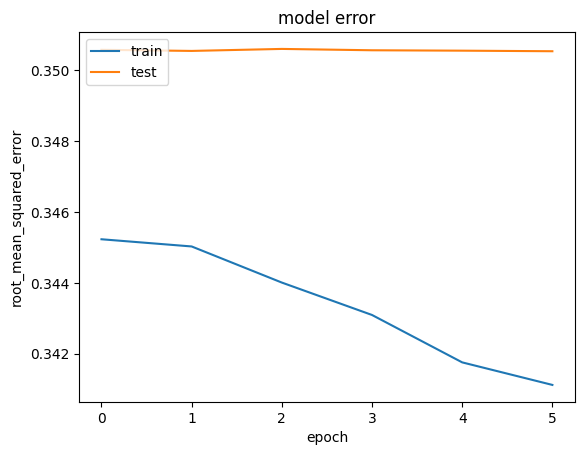

In [26]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


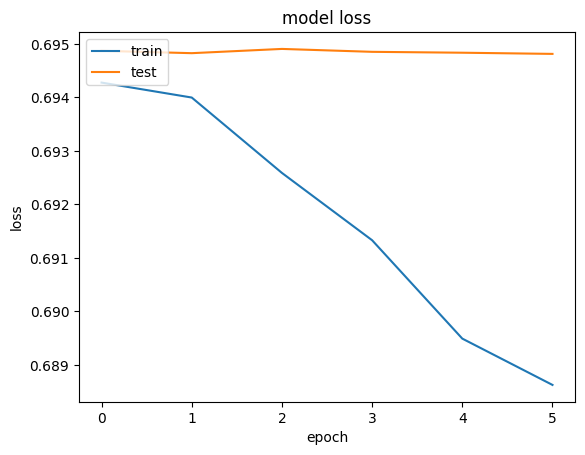

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### 4.4. Tes Rekomendasi

Melakukan uji coba atau tes rekomendasi tempat yang diberikan. Namun perlu dikertahui terlebih dahulu untuk variabel khusus orang yang belum pernah mengunjungi tempat tersebut (belum memberikan rating) dengan place_not_rated.

In [28]:
place_df = places
ratings_df = ratings

In [29]:
user_id = ratings_df.User_Id.sample(1).iloc[0]
place_rated = ratings_df[ratings_df.User_Id == user_id]

place_not_rated = place_df[~place_df['Place_Id'].isin(
    place_rated.Place_Id.values)]['Place_Id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)


Melakukan pengujian prediksi hasil rekomendasi tempat berdasarkan nama tempat dan kategori.

In [32]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name + ':', row.Category)

print('-----' * 8)
print('Top 10 place recommendation')
print('-----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name + ':', row.Category)


13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 112
Place with high ratings from user
----------------------------------------
Hutan Pinus Asri: Cagar Alam
Monumen Perjuangan Rakyat Jawa Barat: Budaya
Old City 3D Trick Art Museum: Budaya
Pantai Ria Kenjeran: Bahari
Balai Kota Surabaya: Budaya
----------------------------------------
Top 10 place recommendation
----------------------------------------
Ciputra Waterpark: Taman Hiburan
Masjid Nasional Al-Akbar: Tempat Ibadah
Museum TNI AL Loka Jala Crana: Budaya
Jembatan Merah: Budaya
Keraton Surabaya: Budaya
Klenteng Sanggar Agung: Budaya
Museum Kesehatan Dr. Adhyatma: Budaya
Taman Hiburan Rakyat: Taman Hiburan
Museum Mpu Tantular: Budaya
Taman Flora Bratang Surabaya: Taman Hiburan


Berdasarkan hasil rekomendasi tempat di atas, dapat dilihat bahwa sistem rekomendasi mengambil pengguna acak (14), lalu dilakukan pencarian tempat dengan rating terbaik dari user tersebut.

- Margasatwa Muara Angke: **Cagar Alam**
- Situs Warungboto: **Taman Hiburan**
- Stone Garden Citatah: **Taman Hiburan**
- Gua Pawon: **Cagar Alam**
- Semarang Chinatown: **Budaya**

Selanjutnya, sistem akan menampilkan 10 daftar tempat yang direkomendasikan berdasarkan kategori yang dimiliki terhadap data pengguna acak tadi. Dapat dilihat bahwa sistem merekomendasikan beberapa tempat dengan kategori yang sama, seperti

- Pantai Goa Cemara: **Bahari**
- Desa Wisata Kelor: **Taman Hiburan**
- Pantai Kukup: **Bahari**
- Pantai Pok Tunggal: **Bahari**
- Balai Kota Surabaya: **Budaya**

# **5. Kesimpulan**

Dengan begitu, dapat disimpulkan bahwa sistem berhasil melakukan rekomendasi baik dengan pendekatan _collaborative filtering_ dan _collaborative filtering_ membutuhkan data penilaian tempat dari pengguna.